In [20]:
import os
import sys
import yaml
from glob import glob
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as astropy_cosmo
import pandas as pd
from tqdm import tqdm

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.lenses.strong_lens import StrongLens

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

# set HWO directory
hwo_dir = os.path.join(repo_dir, 'hwo')

In [21]:
Double_SLACS = ['SDSSJ0029-0055', 'SDSSJ0037-0942', 'SDSSJ0819+4534', 'SDSSJ0903+4116', 'SDSSJ0936+0913',
                'SDSSJ0959+0410', 'SDSSJ1134+6027', 'SDSSJ1204+0358', 'SDSSJ1213+6708', 'SDSSJ1218+0830',
                'SDSSJ1531-0105', 'SDSSJ1621+3931', 'SDSSJ1627-0053', 'SDSSJ2302-0840']

Single_SLACS = ['SDSSJ0008-0004', 'SDSSJ0252+0039', 'SDSSJ0330-0020', 'SDSSJ0728+3835', 'SDSSJ0737+3216',
                'SDSSJ0912+0029', 'SDSSJ1023+4230', 'SDSSJ1100+5329', 'SDSSJ1112+0826', 'SDSSJ1250+0523',
                'SDSSJ1306+0600', 'SDSSJ1313+4615', 'SDSSJ1402+6321', 'SDSSJ1630+4520', 'SDSSJ1636+4707',
                'SDSSJ2238-0754', 'SDSSJ2300+0022', 'SDSSJ2303+1422', 'SDSSJ2343-0030', 'SDSSJ2347-0005']

Double_SL2S = ['SL2SJ0208-0714', 'SL2SJ0219-0829', 'SL2SJ1427+5516']
Single_SL2S = ['SL2SJ0214-0405', 'SL2SJ0217-0513', 'SL2SJ0225-0454', 'SL2SJ0226-0406', 'SL2SJ0226-0420',
               'SL2SJ0232-0408', 'SL2SJ0849-0251', 'SL2SJ0849-0412', 'SL2SJ0858-0143', 'SL2SJ0901-0259',
               'SL2SJ0904-0059', 'SL2SJ0959+0206', 'SL2SJ1358+5459', 'SL2SJ1359+5535', 'SL2SJ1401+5544',
               'SL2SJ1402+5505', 'SL2SJ1405+5243', 'SL2SJ1406+5226', 'SL2SJ1411+5651', 'SL2SJ1420+5630',
               'SL2SJ2214-1807']

Double_BELLS = ['SDSSJ0801+4727', 'SDSSJ0944-0147', 'SDSSJ1234-0241', 'SDSSJ1349+3612', 'SDSSJ1542+1629',
                'SDSSJ1631+1854', 'SDSSJ2125+0411']
Single_BELLS = ['SDSSJ0151+0049', 'SDSSJ0747+5055', 'SDSSJ0830+5116', 'SDSSJ1159-0007', 'SDSSJ1215+0047',
                'SDSSJ1221+3806', 'SDSSJ1318-0104', 'SDSSJ1337+3620', 'SDSSJ1352+3216', 'SDSSJ1545+2748',
                'SDSSJ1601+2138', 'SDSSJ2303+0037']

slacs = Double_SLACS + Single_SLACS
sl2s = Double_SL2S + Single_SL2S
bells = Double_BELLS + Single_BELLS

In [22]:
valid_systems = []
invalid_systems = []

for system in slacs + sl2s + bells:
    files = glob(os.path.join(hwo_dir, 'data', 'dinos_I_tan_et_al_2024', f'*{system}*'))
    if len(files) == 2:
        valid_systems.append(system)
    else:
        invalid_systems.append(system)

print(f'Percentage of valid systems: {len(valid_systems) / (len(valid_systems) + len(invalid_systems)) * 100:.2f}%')

Percentage of valid systems: 100.00%


In [23]:
dinos_df = pd.read_csv(os.path.join(hwo_dir, 'data', 'dinos_I_tan_et_al_2024', 'dinos_I.csv'))

In [24]:
system_name = slacs[0]

# get system information from CSV
row = dinos_df[dinos_df['Lens system'] == system_name].iloc[0]

# get modeling input params from config yaml (lens models)
with open(glob(os.path.join(hwo_dir, 'data', 'dinos_I_tan_et_al_2024', f'{system_name}_config.yml'))[0], 'r') as file:
    dinos_input = yaml.safe_load(file)

# get modeling output params from npy
f = glob(os.path.join(repo_dir, 'hwo', 'data', 'dinos_I_tan_et_al_2024', f'image_{system_name}_*..npy'))[0]
dinos_output = np.load(f, allow_pickle=True)

In [25]:
print(row)

Lens system            SDSSJ0029-0055
Survey                          SLACS
theta_E                         0.945
sig_theta_E_up                  0.003
sig_theta_E_low                 0.003
gamma                            2.69
sig_gamma_up                     0.04
sig_gamma_low                    0.05
sig_gamma_sys                    0.25
q_m                              0.66
sig_q_m_up                       0.04
sig_q_m_low                      0.04
phi_m                              64
sig_phi_m_up                        2
sig_phi_m_low                       1
gamma_shear                     0.009
sig_gamma_shear_up              0.005
sig_gamma_shear_low             0.005
phi_shear                         -26
sig_phi_shear_hi                   10
sig_phi_shear_low                   9
q_L                             0.837
sig_q_L_up                      0.001
sig_q_L_low                     0.002
phi_L                            63.5
sig_phi_L_up                      0.2
sig_phi_L_lo

In [26]:
pprint(dinos_input)

{'band': ['F606W', 'F814W'],
 'fitting': {'mcmc_settings': {'burnin_step': 0,
                               'iteration_step': 3000,
                               'walker_ratio': 16},
             'psf_iteration': False,
             'psf_iteration_settings': {'block_neighbor': 0.0,
                                        'psf_iteration_factor': 0.5,
                                        'psf_iteration_num': 50,
                                        'psf_symmetry': 4},
             'pso': True,
             'pso_settings': {'num_iteration': 150, 'num_particle': 192},
             'sampler': 'MCMC',
             'sampling': True},
 'guess_params': {'lens': {0: {'theta_E': 0.96}}},
 'kwargs_constraints': {'joint_lens_light_with_lens_light': [[0,
                                                              1,
                                                              ['e1',
                                                               'e2',
                                      

In [27]:
pprint(dinos_output)

array([{'background_rms': 0.00029631189324636365, 'dec_at_xy_0': -1.8107046286010773, 'dec_shift': -0.0068, 'exposure_time': array([[30800., 30800., 30800., ..., 30800., 30800., 30800.],
              [30800., 30800., 30800., ..., 30800., 30800., 30800.],
              [30800., 30800., 30800., ..., 30800., 30800., 30800.],
              ...,
              [30800., 30800., 30800., ..., 30800., 30800., 30800.],
              [30800., 30800., 30800., ..., 30800., 30800., 30800.],
              [30800., 30800., 30800., ..., 30800., 30800., 30800.]]), 'image_data': array([[0.00056534, 0.001007  , 0.00135763, ..., 0.00086305, 0.00059139,
               0.00058405],
              [0.00062454, 0.00061791, 0.00055961, ..., 0.00083507, 0.00062346,
               0.00070767],
              [0.0004354 , 0.00045868, 0.00060496, ..., 0.00030431, 0.00010423,
               0.00010778],
              ...,
              [0.00065608, 0.00108768, 0.00040198, ..., 0.00106857, 0.0010554 ,
               0.

In [32]:
for i, item in enumerate(dinos_output):
    print(f"Item {i}:")
    if isinstance(item, dict):
        for key in item.keys():
            print(f"  {key}")
    else:
        print(f"  {item}")

Item 0:
  background_rms
  dec_at_xy_0
  dec_shift
  exposure_time
  image_data
  ra_at_xy_0
  ra_shift
  transform_pix2angle
  lens_light_subtracted_image_data
Item 1:
  kernel_point_source
  psf_type
  kernel_point_source_init
Item 2:
  supersampling_factor
  supersampling_convolution
  supersampling_kernel_size
  flux_evaluate_indexes
  point_source_supersampling_factor
  compute_mode
Item 3:
  mask
  band
  kwargs_result


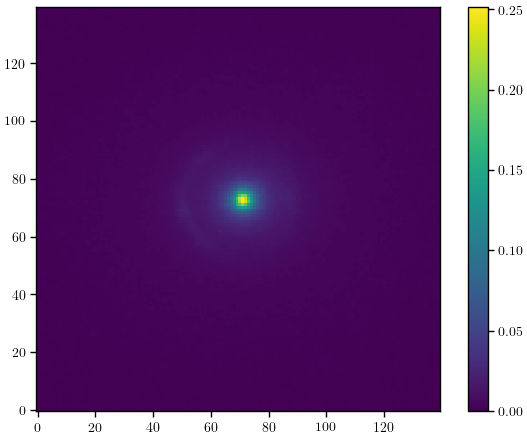

In [34]:
plt.imshow(dinos_output[0]['image_data'])
plt.colorbar()
plt.show()

In [28]:
pprint(dinos_input['model'])

{'lens': ['PEMD', 'SHEAR_GAMMA_PSI'],
 'lens_light': ['SERSIC_ELLIPSE',
                'SERSIC_ELLIPSE',
                'SERSIC_ELLIPSE',
                'SERSIC_ELLIPSE'],
 'lens_light_band_indices': [0, 0, 1, 1],
 'point_source': [],
 'source_light': ['SHAPELETS', 'SERSIC_ELLIPSE', 'SHAPELETS', 'SERSIC_ELLIPSE'],
 'source_light_band_indices': [0, 0, 1, 1]}


In [29]:
pprint(dinos_output[3]['kwargs_result'])

{'kwargs_extinction': [],
 'kwargs_lens': [{'center_x': 0.0057191207462888,
                  'center_y': 0.0008977770532772498,
                  'e1': -0.12110457621118777,
                  'e2': 0.1558830493903703,
                  'gamma': 2.667879754070831,
                  'theta_E': 0.9436753999311065},
                 {'dec_0': 0,
                  'gamma_ext': 0.012221908500621211,
                  'psi_ext': -0.5105336085300802,
                  'ra_0': 0}],
 'kwargs_lens_light': [{'R_sersic': 3.4469319150573257,
                        'amp': 1,
                        'center_x': 0.0057191207462888,
                        'center_y': 0.0008977770532772498,
                        'e1': -0.054110677673533315,
                        'e2': 0.07056241490969933,
                        'n_sersic': 4.0},
                       {'R_sersic': 0.1926278446206916,
                        'amp': 1,
                        'center_x': 0.0057191207462888,
                        

In [30]:
z_lens = float(row['z_lens'])
z_source = float(row['z_source'])

lens_mags = {
    'J': 17.5664222662219
}

source_mags = {
    'J': 21.434711611915137
}

kwargs_lens = dinos_output[3]['kwargs_result']['kwargs_lens']
kwargs_lens_light = dinos_output[3]['kwargs_result']['kwargs_lens_light']
kwargs_source = dinos_output[3]['kwargs_result']['kwargs_source']

kwargs_params = {
    'kwargs_lens': kwargs_lens,
    'kwargs_lens_light': kwargs_lens_light,
    'kwargs_source': kwargs_source
}

kwargs_model = {
    'cosmo': astropy_cosmo.default_cosmology.get(),
    'lens_light_model_list': dinos_input['model']['lens_light'],
    'lens_model_list': dinos_input['model']['lens'],
    'lens_redshift_list': [z_lens] * len(kwargs_lens),
    'source_light_model_list': dinos_input['model']['source_light'],
    'source_redshift_list': [z_source] * len(kwargs_source),
    'z_source': z_source,
    'z_source_convention': 5.
}
assert len(kwargs_model['lens_model_list']) == len(kwargs_model['lens_redshift_list'])
assert len(kwargs_model['source_light_model_list']) == len(kwargs_model['source_redshift_list'])

strong_lens = StrongLens(kwargs_model=kwargs_model,
                         kwargs_params=kwargs_params,
                         lens_mags=lens_mags,
                         source_mags=source_mags,
                         uid=system_name)

In [31]:
print(strong_lens.z_source)

0.93
